# METHOD 1 USING FORWARD APPROACH 
(ADDING ONE BY ONE VARIABLE AND PREDICTING R-SQUARE)

# Housing Case Study
Problem Statement:
Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

So interpretation is important!

# Step -1 Importing Libraries ,Reading CSV , Analzing Data

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [84]:
houseData = pd.read_csv('Housing.csv')

In [85]:
houseData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [86]:
houseData.shape

(545, 13)

In [87]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Step 2 : Data Visualization

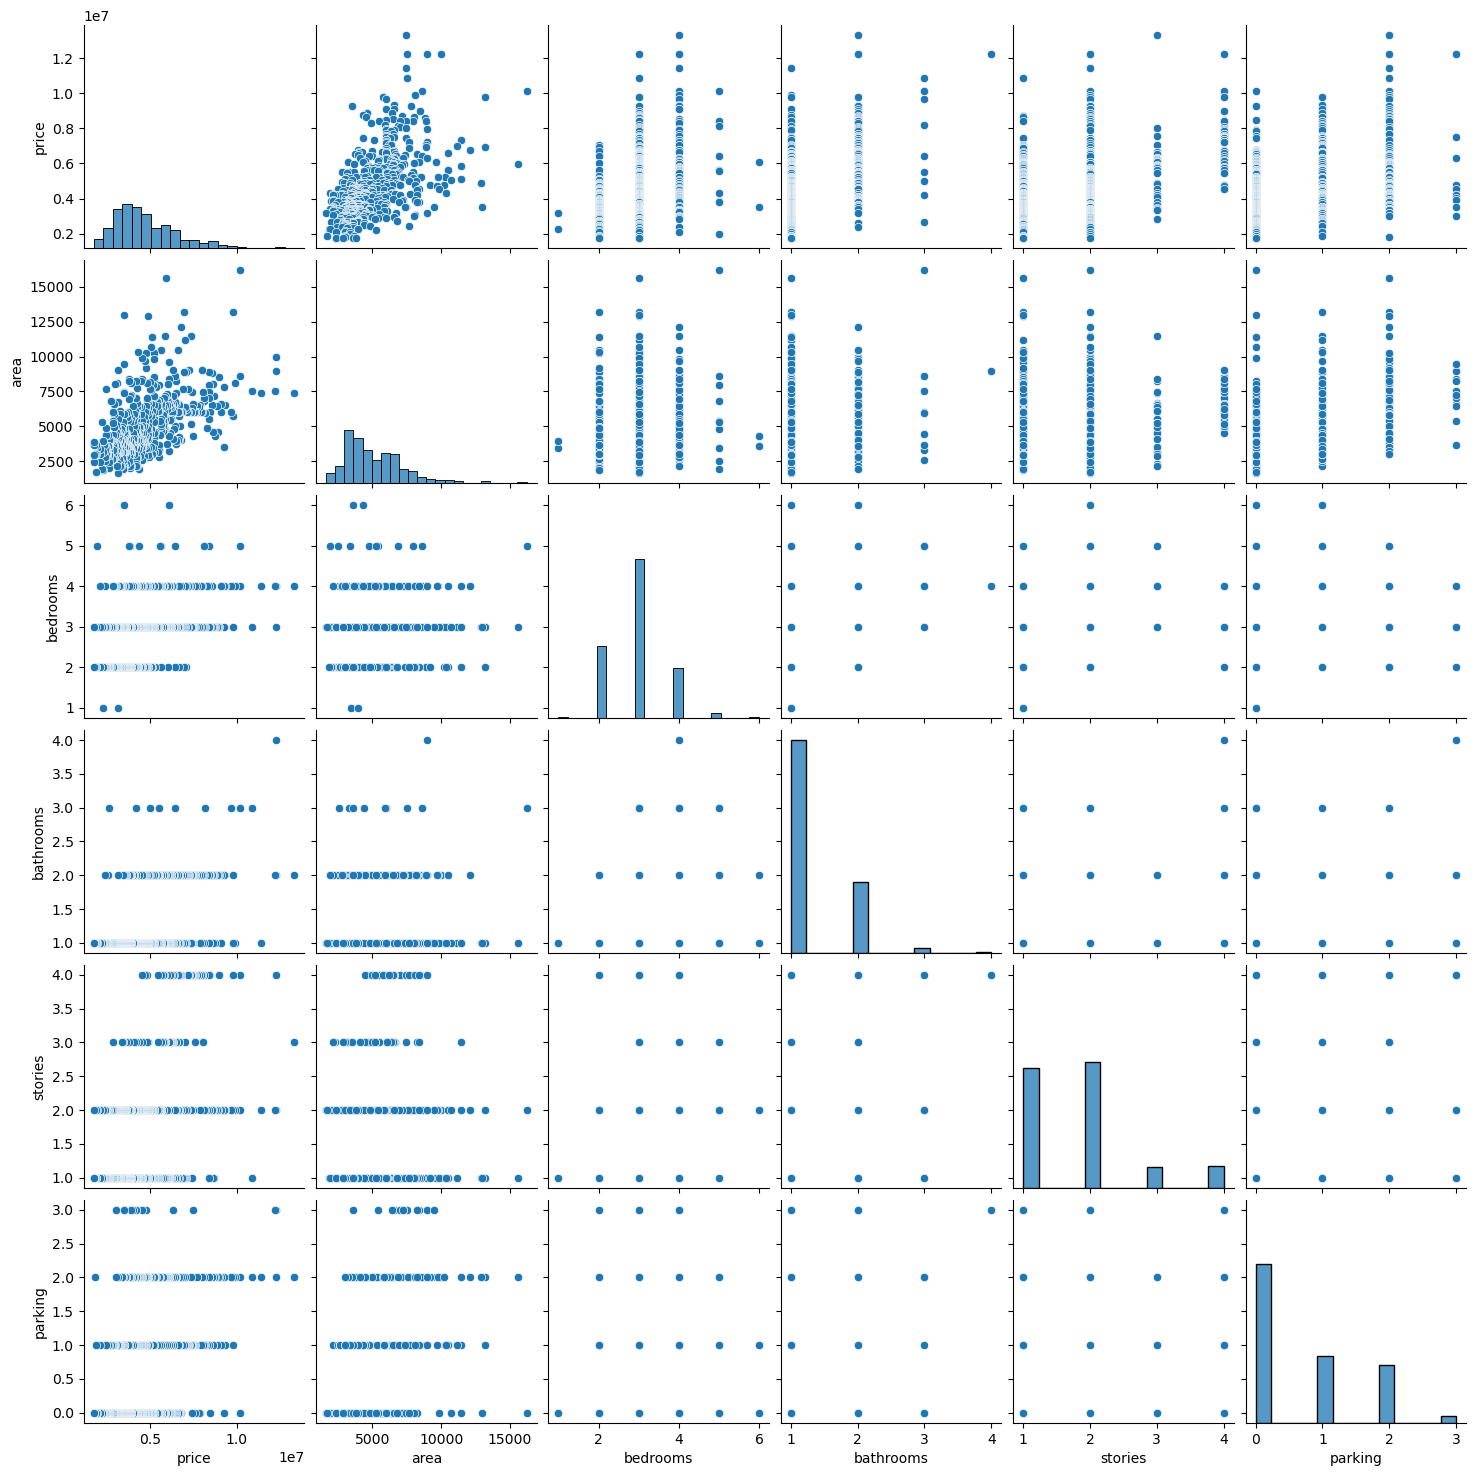

In [89]:
#Considering all numeric Values
sns.pairplot(houseData)
plt.show()

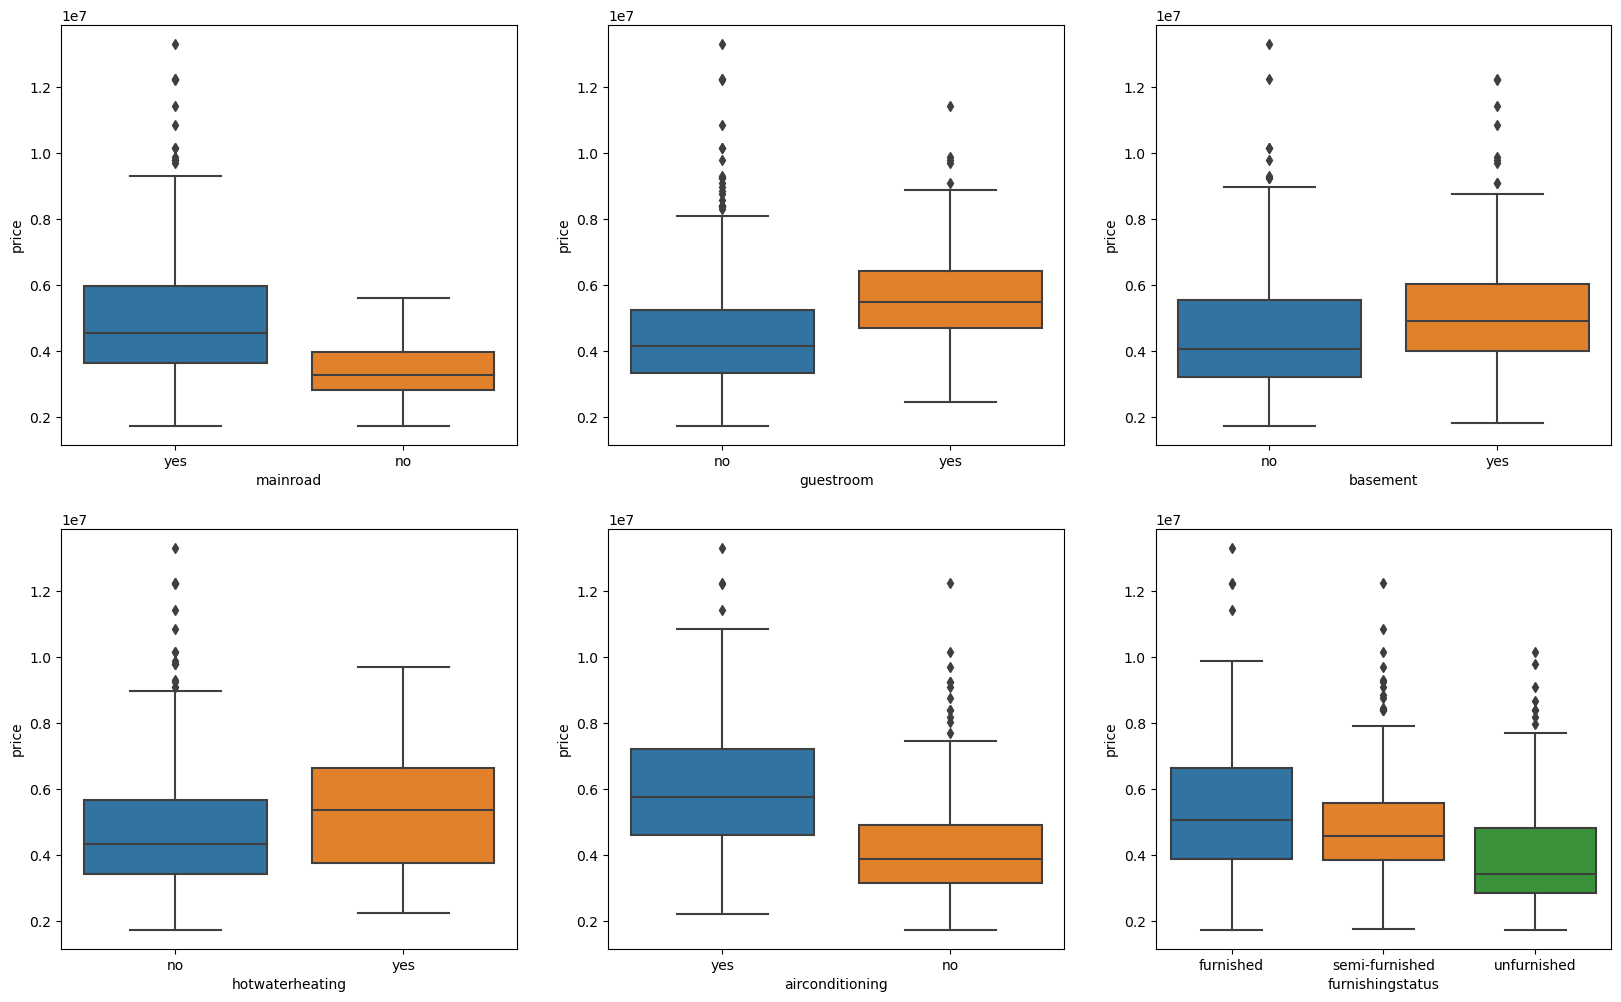

In [90]:
# plotting all categorical Variable
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = houseData)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = houseData)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = houseData)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = houseData)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = houseData)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = houseData)
plt.show()

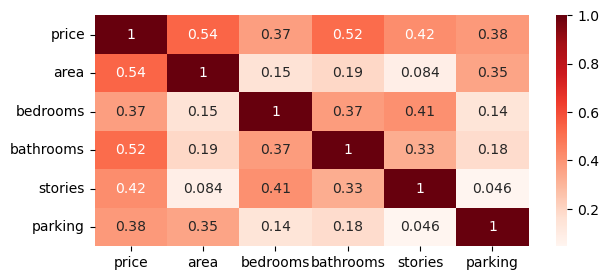

In [94]:
#using Heatmap
plt.figure(figsize=(7,3))
sns.heatmap(houseData.corr(),annot = True,cmap ='Reds')
plt.show()

# Step 3 - Data Preparation 

Cheking for missing Values, Null Values , Proper substitution 

In [11]:
# creating a list of all yes ,no values variables
Convert_to_binary = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [12]:
# substituting all yes ,no with '1' and '0'
def Change_to_binary_Function(x):
        return x.map({'yes':1 , 'no':0})
houseData[Convert_to_binary] = houseData[Convert_to_binary].apply(Change_to_binary_Function)   

In [13]:
#reading data
houseData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [14]:
#describing the data
houseData.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [15]:
#Creating dummy variable using pandas get_dummies() method
dummy_var = pd.get_dummies(houseData['furnishingstatus'])

In [16]:
dummy_var

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [17]:
# dropping furnished as we require n-1 dummy variables for n levels. 
status = pd.get_dummies(houseData['furnishingstatus'] , drop_first = True)

In [18]:
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [19]:
# Concating both table 
houseData = pd.concat([houseData ,status], axis =1)

In [20]:
houseData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [21]:
#dropping furnishingStatus which is no more required.
houseData.drop('furnishingstatus' , axis =1 , inplace = True)

In [22]:
houseData.shape

(545, 14)

# Step 4 : Train and Test Splitting The Data

In [95]:
# creating train and test model by using train_test_split() method of sklearn.models_selection
X_train ,X_test = train_test_split(houseData,train_size = 0.7 , test_size = 0.3 ,random_state = 100 )

In [24]:
# Train set having 70% data
X_train.shape

(381, 14)

In [25]:
# Test set having 30% data
X_test.shape

(164, 14)

# Rescaling

Rescaling the Features
As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:
<br/>
1 . Min-Max scaling<br/>
2 . Standardisation (mean-0, sigma-1)<br/>
This time, we will use MinMax scaling.

In [26]:
#Instantiate the Class MinMaxScaler
scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
varitems = ['area','price','bedrooms','bathrooms','stories','parking']

In [28]:
X_train[varitems] = scaler.fit_transform(X_train[varitems])

In [29]:
X_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [30]:
X_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


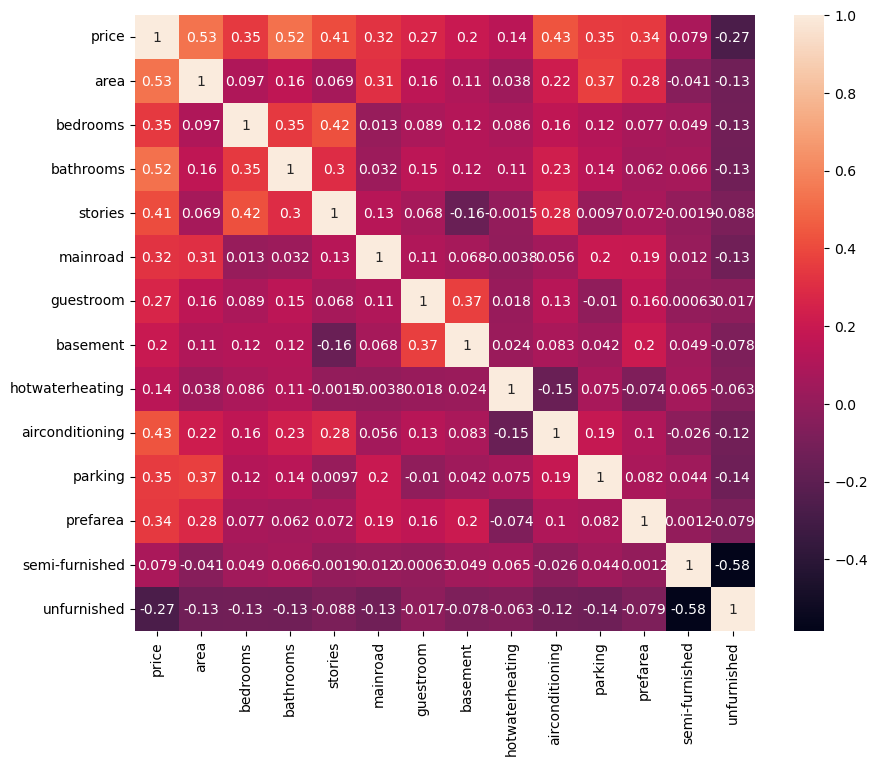

In [31]:
#Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

As you might have noticed, `area` seems to the correlated to `price` the most. Let's see a pairplot for `area` vs `price`.

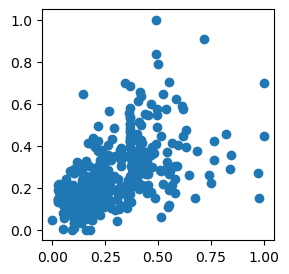

In [32]:
plt.figure(figsize=[3,3])
plt.scatter(X_train.area, X_train.price)
plt.show()

# Dividing into X and Y sets for the model building

In [33]:
y_train = X_train.pop('price')
X_train = X_train

# Step 5: Building a linear model
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [34]:
# add constant to X
X_train_lm = sm.add_constant(X_train['area'])
lr_1 = sm.OLS(y_train,X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.15e-29
Time:                        13:27:23   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 2 - Now take second Variable bathrooms along with area 

In [35]:
# Assign all the feature variables to X
X_train_lm = X_train[['area', 'bathrooms']]

In [36]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_lm)
# Create a first fitted model
lr_2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           2.51e-54
Time:                        13:27:23   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

In [37]:
#Model 3 : airconditioning , area,bathrooms 

In [38]:
# Assign all the feature variables to X
X_train_lm = X_train[['area', 'bathrooms','airconditioning']]

In [97]:
X_train_lm3 = sm.add_constant(X_train_lm)
lr_3 = sm.OLS(y_train,X_train_lm3).fit()

In [96]:
# check the parameters obtained
lr_3.params

const              0.094756
area               0.358061
bathrooms          0.265044
airconditioning    0.086986
dtype: float64

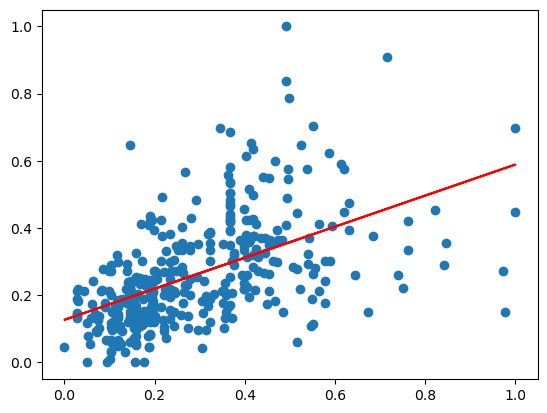

In [100]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm3.iloc[:, 1], y_train)
plt.plot(X_train_lm3.iloc[:, 1], 0.127 + 0.462*X_train_lm3.iloc[:, 1], 'r')
plt.show()

In [98]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.13e-84
Time:                        21:39:26   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014     

# Model 4 : Predict variables for Stories,area,bathrooms,airconditioning 

In [40]:
X_train_lm = X_train[['area','bathrooms','airconditioning','stories']]

In [41]:
X_train_lm4 = sm.add_constant(X_train_lm)
lr_4 =  sm.OLS(y_train,X_train_lm4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     130.2
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.14e-69
Time:                        13:27:23   Log-Likelihood:                 329.46
No. Observations:                 381   AIC:                            -648.9
Df Residuals:                     376   BIC:                            -629.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0719      0.011     

# Model 5 : Predict variables for Stories,area,bathrooms,airconditioning,bedrooms

In [42]:
X_train_lm = X_train[['area','bathrooms','airconditioning','stories' , 'bedrooms']]

In [43]:
X_train_lm5 = sm.add_constant(X_train_lm)
lr_5 =  sm.OLS(y_train,X_train_lm5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     106.2
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.30e-69
Time:                        13:27:24   Log-Likelihood:                 331.89
No. Observations:                 381   AIC:                            -651.8
Df Residuals:                     375   BIC:                            -628.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0443      0.017     

while adding bedrooms it''s p -value become insignificant so we go back to previous model and try to add parking and check.

# Model 6 : Predict variables for Stories,area,bathrooms,airconditioning,prefarea

In [44]:
X_train_lm = X_train[['area','bathrooms','airconditioning','stories' ,'prefarea']]

In [45]:
X_train_lm6 = sm.add_constant(X_train_lm)
lr_6 =  sm.OLS(y_train,X_train_lm6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     118.5
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           6.07e-75
Time:                        13:27:24   Log-Likelihood:                 344.42
No. Observations:                 381   AIC:                            -676.8
Df Residuals:                     375   BIC:                            -653.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0701      0.010     

# Model 7 : Predict variables for Stories,area,bathrooms,airconditioning,parking,prefarea

In [46]:
X_train_lm = X_train[['area','bathrooms','airconditioning','stories' ,'prefarea','parking']]

In [47]:
X_train_lm7 = sm.add_constant(X_train_lm)
lr_7 =  sm.OLS(y_train,X_train_lm7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           2.83e-77
Time:                        13:27:24   Log-Likelihood:                 352.42
No. Observations:                 381   AIC:                            -690.8
Df Residuals:                     374   BIC:                            -663.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0645      0.010     

# Model 8 : Predict variables for Stories,area,bathrooms,airconditioning,parking,prefarea,mainroad

In [48]:
X_train_lm = X_train[['area','bathrooms','airconditioning','stories' ,'prefarea','parking','mainroad']]

In [49]:
X_train_lm8 = sm.add_constant(X_train_lm)
lr_8 =  sm.OLS(y_train,X_train_lm8).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     95.42
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.62e-79
Time:                        13:27:24   Log-Likelihood:                 359.35
No. Observations:                 381   AIC:                            -702.7
Df Residuals:                     373   BIC:                            -671.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0289      0.014     

# Model 9 : Predict variables for Stories,area,bathrooms,airconditioning,parking,prefarea,mainroad,guestroom

In [50]:
X_train_lm = X_train[['area','bathrooms','airconditioning','stories' ,'prefarea','parking','mainroad','guestroom']]

In [51]:
X_train_lm9 = sm.add_constant(X_train_lm)
lr_9 =  sm.OLS(y_train,X_train_lm9).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     86.55
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.71e-80
Time:                        13:27:24   Log-Likelihood:                 364.10
No. Observations:                 381   AIC:                            -710.2
Df Residuals:                     372   BIC:                            -674.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0283      0.014     

# Model 10 :

In [52]:
X_train_lm = X_train[['area','bathrooms','airconditioning','stories' ,'prefarea','parking','mainroad','guestroom','semi-furnished']]

In [53]:
X_train_lm10 = sm.add_constant(X_train_lm)
lr_10 =  sm.OLS(y_train,X_train_lm10).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     78.24
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.43e-80
Time:                        13:27:24   Log-Likelihood:                 366.53
No. Observations:                 381   AIC:                            -713.1
Df Residuals:                     371   BIC:                            -673.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0194      0.014     

In [54]:
Model :11

In [55]:
X_train_lm = X_train[['area','bathrooms','airconditioning','stories' ,'prefarea','parking','mainroad','guestroom','semi-furnished','hotwaterheating','basement']]

In [56]:
X_train_lm11 = sm.add_constant(X_train_lm)
lr_11 =  sm.OLS(y_train,X_train_lm11).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     69.56
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           5.93e-83
Time:                        13:27:24   Log-Likelihood:                 377.74
No. Observations:                 381   AIC:                            -731.5
Df Residuals:                     369   BIC:                            -684.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0101      0.014     

# Model - 12

In [70]:
X_train_lm = X_train[['area','bathrooms','airconditioning','stories' ,'prefarea','parking','mainroad','guestroom','unfurnished','hotwaterheating']]

In [71]:
X_train_lm12 = sm.add_constant(X_train_lm)
lr_12 =  sm.OLS(y_train,X_train_lm12).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.13e-84
Time:                        13:32:30   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014     

This is more promising model uptil now have a good R squared value of 67% and it''s P-value is also significant

# Step 5: Checking for residuals

In [ ]:
y_train_price = lr_12.predict(X_train_lm12)

In [ ]:
result = y_train - y_train_price

In [ ]:
sns.distplot(result)
plt.show()

# Step 6 : Making Predictions Using the Final Model
    
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. twelveth model.

In [ ]:
# on test set

In [60]:
varitems = ['area','price','bedrooms','bathrooms','stories','parking']

X_test[varitems] = scaler.transform(X_test[varitems])

In [73]:
X_test.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
y_test = X_test.pop('price')


In [63]:
X_test_1 = X_test

In [64]:
X_test_1.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [72]:
X_test_lm = X_test_1[['area','bathrooms','airconditioning','stories' ,'prefarea','parking','mainroad','guestroom','unfurnished','hotwaterheating']]

In [74]:
X_test_const = sm.add_constant(X_test_lm)

In [75]:
lr = sm.OLS(y_test,X_test_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     34.25
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.43e-34
Time:                        13:33:47   Log-Likelihood:                 152.77
No. Observations:                 164   AIC:                            -283.5
Df Residuals:                     153   BIC:                            -249.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0811      0.025     

In [77]:
y_test_pred = lr.predict(X_test_const)

In [78]:
res = y_test -y_test_pred

C:\Users\Satya\AppData\Local\Temp\ipykernel_13480\1482882585.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


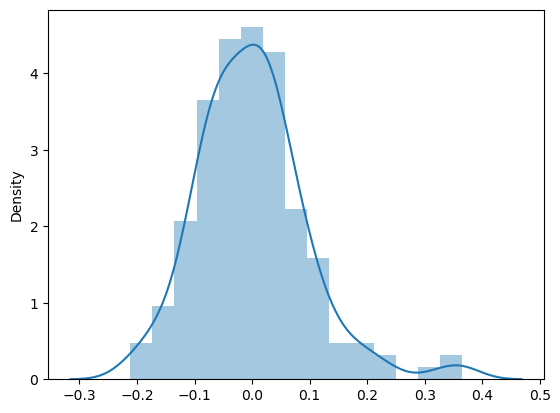

In [79]:
sns.distplot(res)
plt.show()

# Step - Model Evaluation

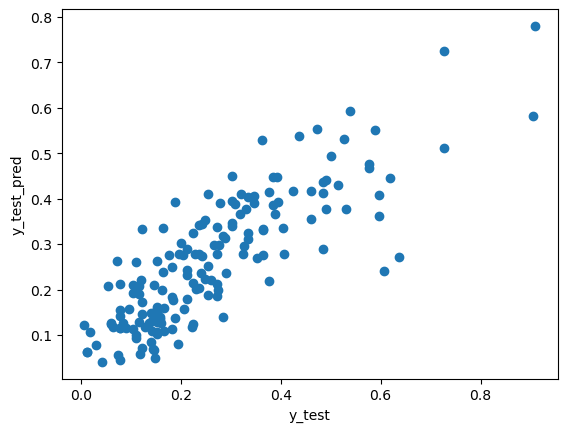

In [80]:
plt.scatter(y_test , y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

So,here we can see that line is best fit with eq: as 
    price = 0.234 * area + 0.201 * bathrooms + 0.069 * airconditioning + 0.11 * stories + 0.0637 * prefarea + 0.0629 * parking +
            0.05 * mainroad + 0.040 * guestroom - 0.0337 * unfurnished + 0.087 * hotwaterheating 

Overall we have a decent model.With signiificant p-value and R squared value of 67%.It also perform well on test set.